In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt


Data collection and analysis

In [2]:
data = pd.read_csv('diabetes_data.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
#checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Data Preprocessing

In [4]:
#dropping unnecessary columns
data = data.drop(['Education','Income','NoDocbcCost','AnyHealthcare','CholCheck'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  GenHlth               253680 non-null  float64
 12  MentHlth              253680 non-null  float64
 13  PhysHlth              253680 non-null  float64
 14  DiffWalk              253680 non-null  float64
 15  

<Axes: >

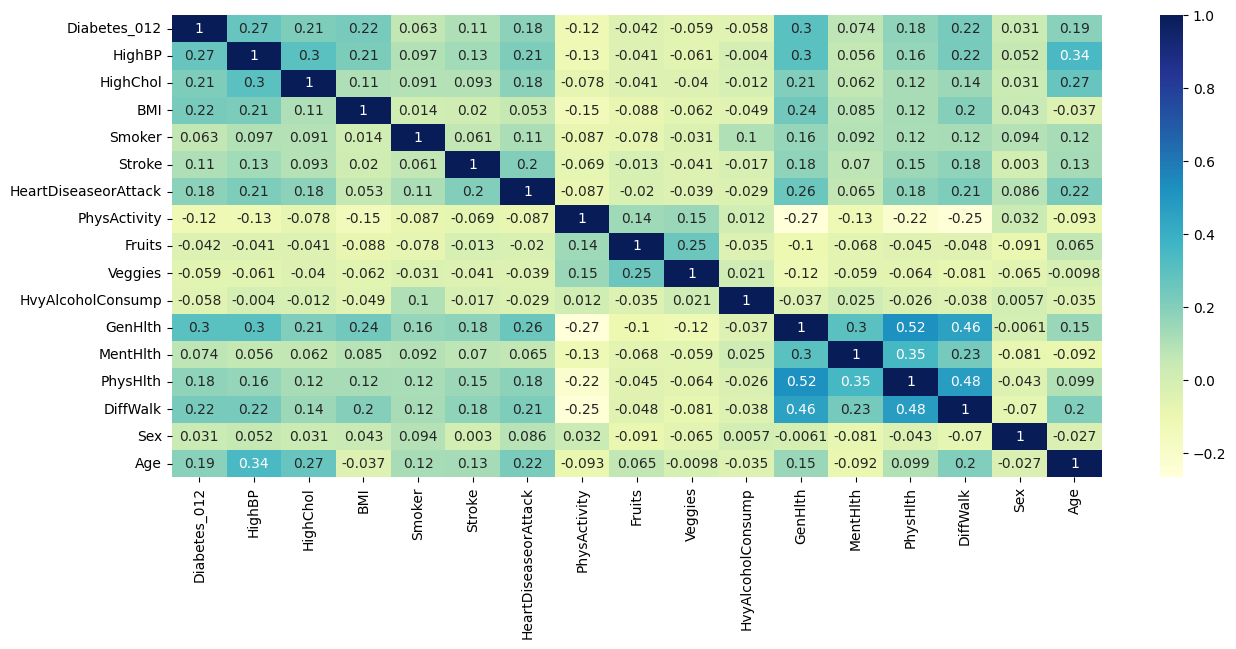

In [5]:
#visualizing correlation
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True, cmap='YlGnBu')

Bar chart of the features

array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>],
       [<Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

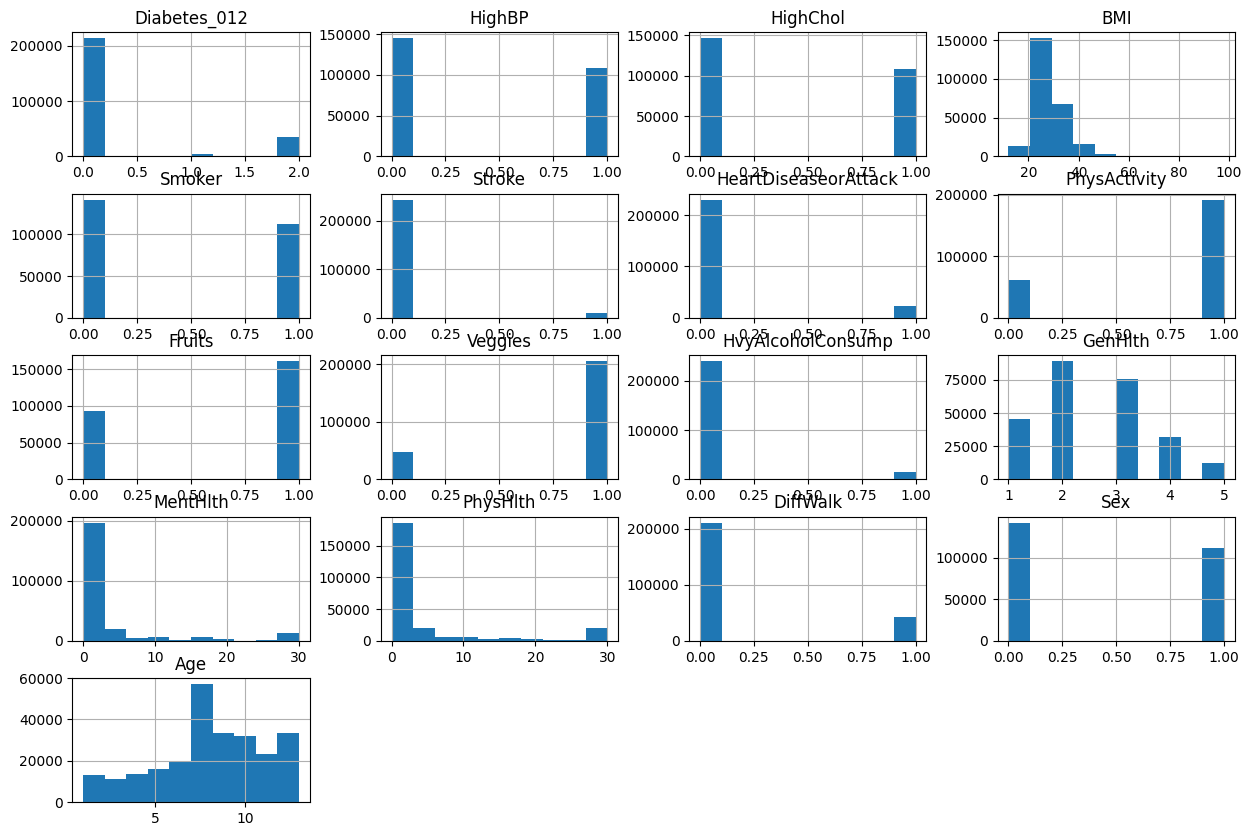

In [6]:
data.hist(figsize=(15,10))

In [7]:
#splitting data into male and female (male=1, female=0)
male_data = data[data['Sex']==1]
female_data = data[data['Sex']==0]

In [8]:
#dropping the 'sex' column from both datasets
male_data = male_data.drop(['Sex'],axis=1)
female_data = female_data.drop(['Sex'],axis=1)

In [9]:
print(male_data.shape)
print(female_data.shape)

(111706, 16)
(141974, 16)


<Axes: >

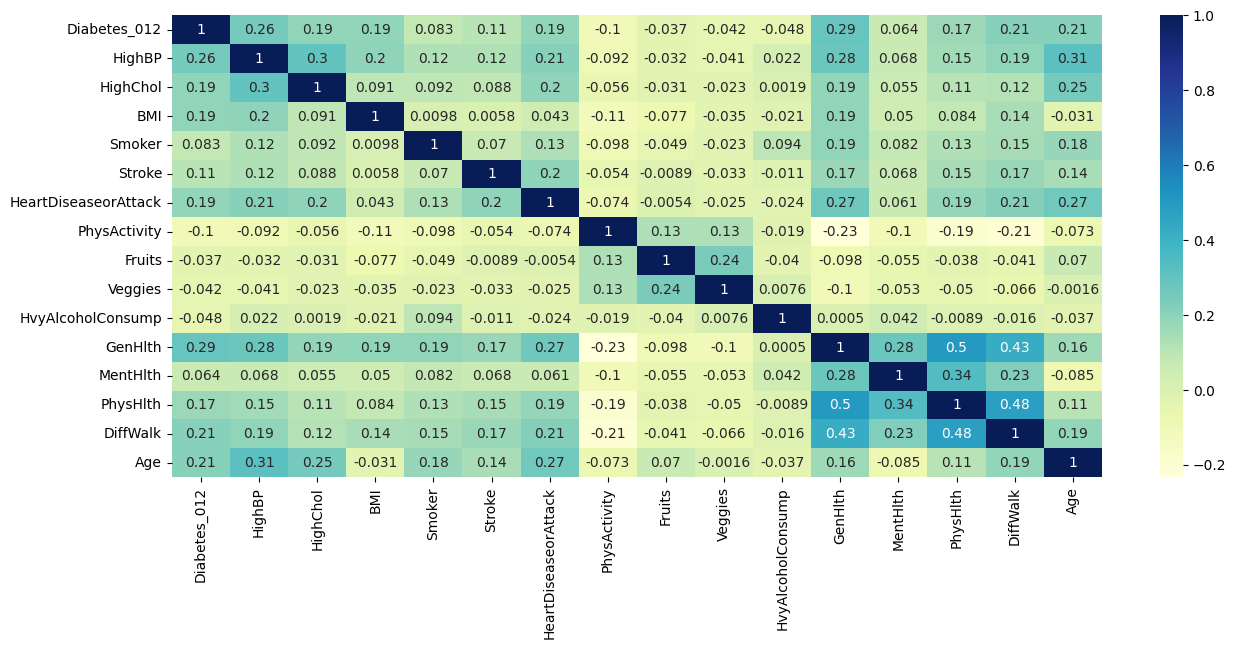

In [10]:
#male correlation
plt.figure(figsize=(15,6))
sns.heatmap(male_data.corr(),annot=True, cmap='YlGnBu')


<Axes: >

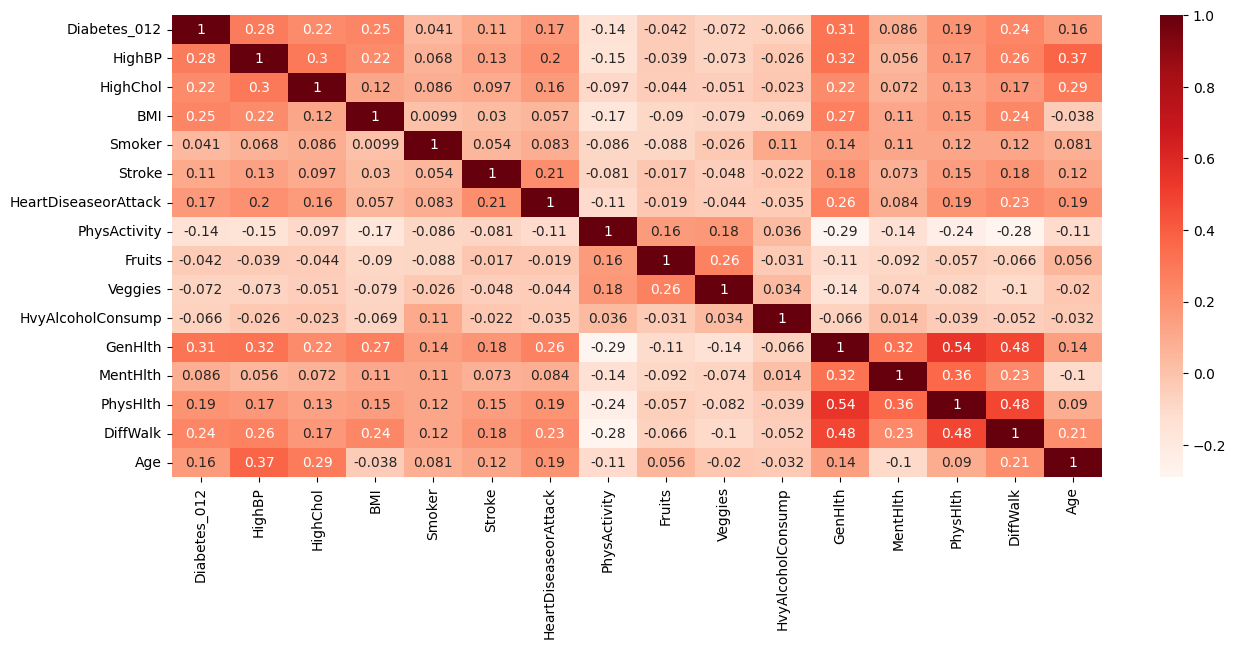

In [11]:
#female correlation
plt.figure(figsize=(15,6))
sns.heatmap(female_data.corr(), annot=True, cmap='Reds')

checking the values of outcome:\
<br>0 = No diabetes\
    1 = pre-diabetes\
    2 = Diabetes

In [12]:
data['Diabetes_012'].value_counts()
#here 0 =

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Data Splitting

In [13]:
male_x = male_data.drop(['Diabetes_012'], axis=1)
male_y = male_data['Diabetes_012']

female_x = female_data.drop(['Diabetes_012'], axis=1)
female_y = female_data['Diabetes_012']

Fixing imbanalce by random oversampling

In [14]:
from imblearn.over_sampling import RandomOverSampler
# Apply random oversampling
ros = RandomOverSampler(random_state=42)
male_x, male_y = ros.fit_resample(male_x, male_y)

Data Standardization

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(male_x)
scaler.fit(female_x)

StandardScaler()

In [17]:
male_x_std = scaler.transform(male_x)
female_x_std = scaler.transform(female_x)
print('Male scaled values:')
print(male_x_std[0])

print('Female scaled values: ')
print(female_x_std[0])


Male scaled values:
[ 1.20936367  1.19849977 -0.44166507  1.21991657 -0.2042559  -0.27829146
  0.58631357  0.69672485  0.44631366 -0.24130502 -0.47950971 -0.47187981
 -0.2894456  -0.48675824  0.62253361]
Female scaled values: 
[ 1.20936367  1.19849977  1.67454362  1.21991657 -0.2042559  -0.27829146
 -1.70557198 -1.43528683  0.44631366 -0.24130502  2.30205674  1.81421569
  1.17146173  2.05440795  0.29381367]


Train-Test split

In [18]:
male_x_train, male_x_test, male_y_train, male_y_test = train_test_split(male_x_std, male_y, test_size=0.3, stratify=male_y, random_state=2)
#stratify splits data such that train and test has mixup of y outcomes

female_x_train, female_x_test, female_y_train, female_y_test = train_test_split(female_x_std, female_y, test_size=0.3, stratify=female_y, random_state=2)


Training k-nearest neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_male = KNeighborsClassifier(n_neighbors=10)


In [20]:
#training knn using male data
knn_classifier_male.fit(male_x_train,male_y_train)

KNeighborsClassifier(n_neighbors=10)

Accuracy Score of k-nearest neighbors

In [21]:
#checking accuracy of male train data
male_train_prediction = knn_classifier_male.predict(male_x_train)
training_accuracy = accuracy_score(male_train_prediction, male_y_train)
print(training_accuracy)
print(f'The accuracy of male train data using knn is: {round(training_accuracy*100, 3)} %')

0.8369856542857437
The accuracy of male train data using knn is: 83.699 %


In [22]:
#checking accuracy of male test data
male_test_predict_knn = knn_classifier_male.predict(male_x_test)
training_accuracy = accuracy_score(male_test_predict_knn, male_y_test)
print(training_accuracy)
print(f'The accuracy of male TEST data using knn is: {round(training_accuracy*100, 3)} %')

0.8024919132622499
The accuracy of male TEST data using knn is: 80.249 %


Training Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest_male = RandomForestClassifier()

In [24]:
forest_male.fit(male_x_train, male_y_train)

RandomForestClassifier()

Accuracy Score of Random Forest

In [25]:
#checking accuracy of male train data
male_train_predict_forest = forest_male.predict(male_x_train)
training_accuracy = accuracy_score(male_train_predict_forest, male_y_train)
print(training_accuracy)
print(f'The accuracy of male TRAIN data using Random Forest is: {round(training_accuracy*100, 3)} %')

0.9584467195859562
The accuracy of male TRAIN data using Random Forest is: 95.845 %


In [26]:
#checking accuracy of male test data
male_test_predict_forest = forest_male.predict(male_x_test)
training_accuracy = accuracy_score(male_test_predict_forest, male_y_test)
print(training_accuracy)
print(f'The accuracy of male TEST data using Random Forest is: {round(training_accuracy*100, 3)} %')

0.9123517431412483
The accuracy of male TEST data using Random Forest is: 91.235 %


Training Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

In [28]:
nb_classifier.fit(male_x_train, male_y_train)

GaussianNB()

Accuracy Score of Naive Bayes Classifier

In [29]:
#checking accuracy of male train data
male_train_predict_nb = nb_classifier.predict(male_x_train)
training_accuracy = accuracy_score(male_train_predict_nb, male_y_train)
print(training_accuracy)
print(f'The accuracy of male TRAIN data using Naive Bayes is: {round(training_accuracy*100, 3)} %')

0.47068216592559126
The accuracy of male TRAIN data using Naive Bayes is: 47.068 %


In [30]:
#checking accuracy of male test data

male_test_predict_nb = nb_classifier.predict(male_x_test)
training_accuracy = accuracy_score(male_test_predict_nb, male_y_test)
print(training_accuracy)
print(f'The accuracy of male TEST data using Naive Bayes is: {round(training_accuracy*100, 3)} %')


0.4701449622618905
The accuracy of male TEST data using Naive Bayes is: 47.014 %


Confusion Matrix for knn Classifier

In [31]:
from sklearn.metrics import confusion_matrix


Text(95.72222222222221, 0.5, 'Actual')

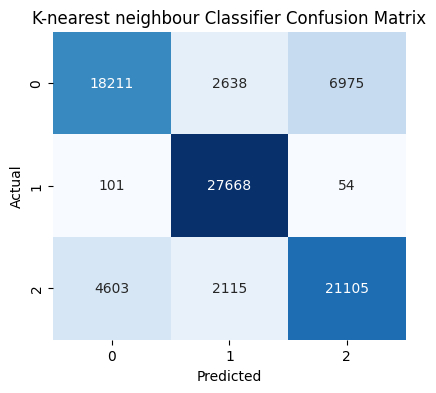

In [32]:
cm_knn = confusion_matrix(male_y_test, male_test_predict_knn)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("K-nearest neighbour Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(95.72222222222221, 0.5, 'Actual')

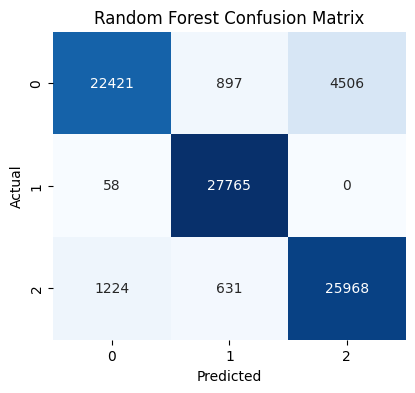

In [33]:
cm_forest = confusion_matrix(male_y_test, male_test_predict_forest)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_forest, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(95.72222222222221, 0.5, 'Actual')

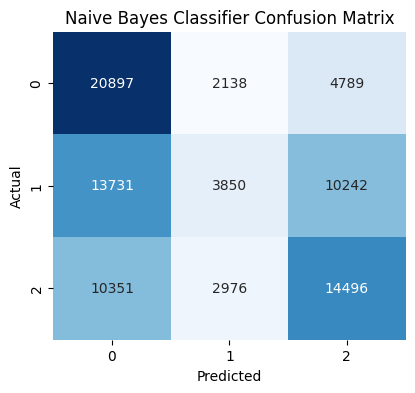

In [34]:
cm_nb = confusion_matrix(male_y_test, male_test_predict_nb)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Naive Bayes Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Bar Chart of 3 models

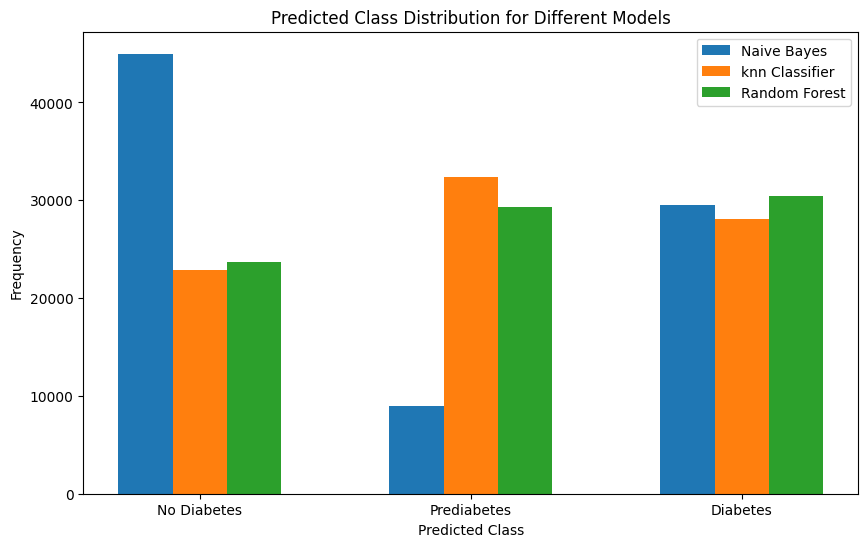

In [35]:
nb_y_pred = np.array(male_test_predict_nb, dtype=int)
knn_y_pred = np.array(male_test_predict_knn, dtype=int)
forest_y_pred = np.array(male_test_predict_forest, dtype=int)

nb_counts = np.bincount(nb_y_pred)
knn_counts = np.bincount(knn_y_pred)
forest_counts = np.bincount(forest_y_pred)

# Create an array of class labels
class_labels = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Create bar charts for each model's predicted class distribution
plt.figure(figsize=(10, 6))

plt.bar(np.arange(len(class_labels)) - 0.2, nb_counts, width=0.2, align='center', label='Naive Bayes')
plt.bar(np.arange(len(class_labels)), knn_counts, width=0.2, align='center', label='knn Classifier')
plt.bar(np.arange(len(class_labels)) + 0.2, forest_counts, width=0.2, align='center', label='Random Forest')

plt.xticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Predicted Class Distribution for Different Models')
plt.legend()

plt.show()

Precision and Recall of the models

In [36]:
from tabulate import tabulate
from sklearn.metrics import precision_score, recall_score

# Assuming male_y_test, male_test_predict_knn, male_test_predict_forest, and male_test_predict_nb are your variables

# Calculate precision and recall for Naive Bayes
nb_precision = precision_score(male_y_test, male_test_predict_nb, average=None, zero_division=0)
nb_recall = recall_score(male_y_test, male_test_predict_nb, average=None, zero_division=0)

# Calculate precision and recall for knn
knn_precision = precision_score(male_y_test, male_test_predict_knn, average=None, zero_division=0)
knn_recall = recall_score(male_y_test, male_test_predict_knn, average=None, zero_division=0)

# Calculate precision and recall for Random Forest
forest_precision = precision_score(male_y_test, male_test_predict_forest, average=None, zero_division=0)
forest_recall = recall_score(male_y_test, male_test_predict_forest, average=None, zero_division=0)

# Round the precision and recall values to 5 decimal places
nb_precision_rounded = [round(p, 5) for p in nb_precision]
nb_recall_rounded = [round(r, 5) for r in nb_recall]

knn_precision_rounded = [round(p, 5) for p in knn_precision]
knn_recall_rounded = [round(r, 5) for r in knn_recall]

forest_precision_rounded = [round(p, 5) for p in forest_precision]
forest_recall_rounded = [round(r, 5) for r in forest_recall]

# Create class labels
class_labels = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Prepare data for tabulation for each model
data_nb = []
data_knn = []
data_forest = []
for label, nb_p, knn_p, forest_p, nb_r, knn_r, forest_r in zip(class_labels, nb_precision_rounded, knn_precision_rounded, forest_precision_rounded, nb_recall_rounded, knn_recall_rounded, forest_recall_rounded):
    data_nb.append([label, nb_p, nb_r])
    data_knn.append([label, knn_p, knn_r])
    data_forest.append([label, forest_p, forest_r])

# Table headers
headers = ["Class", "NB Precision", "NB Recall"]
headers_knn = ["Class", "knn Precision", "knn Recall"]
headers_forest = ["Class", "Forest Precision", "Forest Recall"]

# Display the tables for all three models
nb_table = tabulate(data_nb, headers, tablefmt="pretty")
knn_table = tabulate(data_knn, headers_knn, tablefmt="pretty")
forest_table = tabulate(data_forest, headers_forest, tablefmt="pretty")

print("Naive Bayes Precision and Recall:")
print(nb_table)

print("\nknn Precision and Recall:")
print(knn_table)

print("\nRandom Forest Precision and Recall:")
print(forest_table)


Naive Bayes Precision and Recall:
+-------------+--------------+-----------+
|    Class    | NB Precision | NB Recall |
+-------------+--------------+-----------+
| No Diabetes |   0.46459    |  0.75104  |
| Prediabetes |    0.4295    |  0.13837  |
|  Diabetes   |   0.49094    |  0.52101  |
+-------------+--------------+-----------+

knn Precision and Recall:
+-------------+---------------+------------+
|    Class    | knn Precision | knn Recall |
+-------------+---------------+------------+
| No Diabetes |    0.79472    |  0.65451   |
| Prediabetes |    0.8534     |  0.99443   |
|  Diabetes   |    0.75016    |  0.75855   |
+-------------+---------------+------------+

Random Forest Precision and Recall:
+-------------+------------------+---------------+
|    Class    | Forest Precision | Forest Recall |
+-------------+------------------+---------------+
| No Diabetes |     0.94591      |    0.80582    |
| Prediabetes |     0.94784      |    0.99792    |
|  Diabetes   |     0.85214    

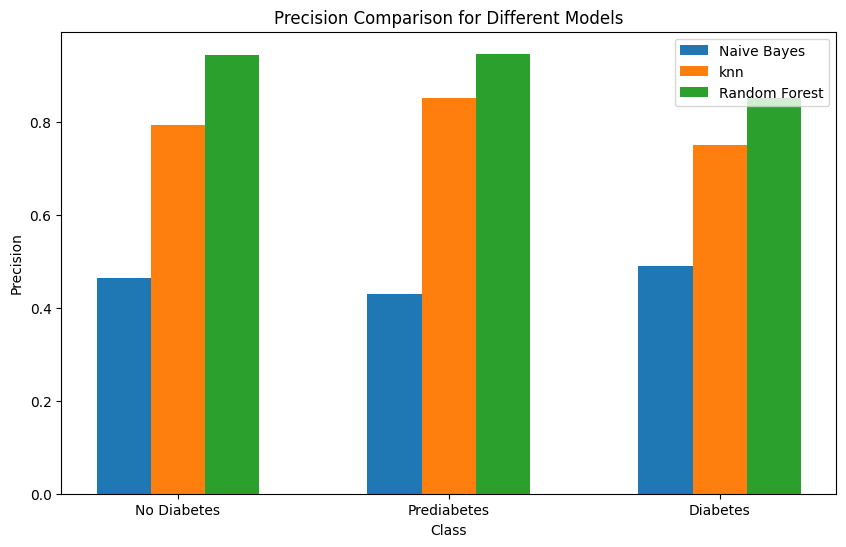

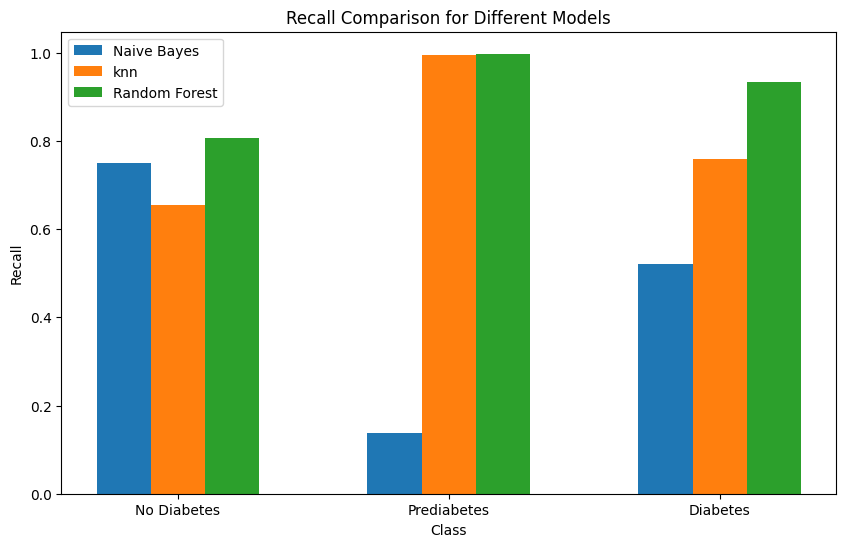

In [37]:
plt.figure(figsize=(10, 6))

class_labels = ['No Diabetes', 'Prediabetes', 'Diabetes']
x = np.arange(len(class_labels))
plt.bar(x - 0.2, nb_precision_rounded, width=0.2, align='center', label='Naive Bayes')
plt.bar(x, knn_precision_rounded, width=0.2, align='center', label='knn')
plt.bar(x + 0.2, forest_precision_rounded, width=0.2, align='center', label='Random Forest')

plt.xticks(x, class_labels)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision Comparison for Different Models')
plt.legend()

plt.show()

# Create bar charts for Recall
plt.figure(figsize=(10, 6))

plt.bar(x - 0.2, nb_recall_rounded, width=0.2, align='center', label='Naive Bayes')
plt.bar(x, knn_recall_rounded, width=0.2, align='center', label='knn')
plt.bar(x + 0.2, forest_recall_rounded, width=0.2, align='center', label='Random Forest')

plt.xticks(x, class_labels)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall Comparison for Different Models')
plt.legend()

plt.show()